# Lezione 12

**Programmazione ad oggetti**

***14.1 Gestione di programmi più grandi***

All’inizio di questo libro, abbiamo visto quattro modelli di programmazione di base utilizzati per scrivere programmi:

- Codice sequenziale
- Codice condizionale (*istruzioni if*)
- Codice ripetitivo (*cicli*)
- Memorizza e riutilizza (*funzioni*).

Nei capitoli precedenti abbiamo esplorato l’uso delle variabili semplici e delle
strutture per la gestione dei dati come elenchi, tuple e dizionari.

Durante lo sviluppo, progettiamo le strutture con cui conserviamo i dati e scriviamo il codice necessario per manipolarle. Esistono molti modi per
scrivere programmi e, a questo punto, probabilmente avremo scritto alcuni script
"non particolarmente eleganti" e altri "più eleganti". Anche se i nostri script sono di dimensioni abbastanza contenute, stiamo iniziando a capire come ci sia un po’ di "arte" ed "estetica" nello sviluppare codice.

Mano a mano che i programmi raggiungono i milioni di righe diventa sempre più
importante scrivere codice che sia facile da interpretare. Se stiamo lavorando su un programma di milioni di righe, non potremo mai tenere in mente l’intero programma. Abbiamo bisogno di trovare modi per spezzare il programma in modo che risolvere problemi, correggere un bug o aggiungere una nuova caratteristica sia il più semplice possibile.

In un certo senso, la programmazione ad oggetti è un modo per organizzare il
codice in modo tale da poter concentrare la nostra attenzione su 500 righe di
codice ignorando momentaneamente le altre 999.500.

***14.2 Come Iniziare***

Come capita per molti aspetti del nostro lavoro, è necessario imparare i concetti di base della programmazione ad oggetti prima di poterla utilizzare in modo efficace. Quindi consideriamo questo capitolo come un modo per studiare alcuni termini e concetti elementari illustrati attraverso alcuni semplici esempi con lo scopo di gettare le basi per l’apprendimento futuro. Anche se da qui in poi adotteremo la programmazione ad oggetti in molti programmi non ne svilupperemo di nuovi.

Quello che vogliamo ottenere con questo capitolo è una conoscenza di base di come siano fatti gli oggetti, come funzionano e, soprattutto, come sfruttarne le possibilità offerte dalle librerie di Python.

***14.3 Utilizzare gli oggetti***

Stiamo per renderci conto che in realtà abbiamo utilizzato gli oggetti durante tutto il corso: Python ci mette a disposizione molti oggetti già integrati al suo interno.
Ecco un semplice script le cui prime righe ci sono molto familiari.

In [ ]:
stuff = list()
stuff.append('python')
stuff.append('chuck')
stuff.sort()
print (stuff[0])
print (stuff.__getitem__(0))
print (list.__getitem__(stuff,0))

- La prima riga sta costruendo un oggetto di tipo lista
- La seconda e la terza linea chiamano il metodo append()
- La quarta riga chiama il metodo sort()
- La quinta riga sta ottenendo l’elemento in posizione 0.
- La sesta riga chiama il metodo `__getitem __()` nell’elenco stuff con parametro zero.
- La settima riga è un modo ancora più dettagliato di recuperare l’elemento che
occupa la posizione zero nell’elenco (`list.__getitem__(stuff,0)`)

In questo script, chiamiamo il metodo `__getitem__` della classe list, lo passiamo nella lista (`stuff`) con l’elemento che vogliamo recuperare dalla lista come secondo parametro.
Le ultime tre righe del programma sono completamente equivalenti, ma è più
semplice utilizzare la sintassi con le parentesi quadre per cercare un elemento in una posizione specifica di un elenco.

Possiamo dare un’occhiata alle potenzialità di un oggetto studiando l’output della funzione dir():

In [ ]:
stuff = list()
dir (stuff)

Più precisamente, `dir()` elenca i metodi e gli attributi di un oggetto.
Il resto di questa lezione ci fornirà una definizione più precisa di tutti i termini già riportati, quindi, dopo aver completato la lezione, rileggiamo i paragrafi precedenti per verificare quanto abbiamo veramente appreso.

***14.4 I primi script***

Un programma nella sua forma più semplice richiede uno o più input, fa qualche
elaborazione e produce un output. Lo script seguente converte il numero di piano in un ascensore da americano a "resto del mondo" é molto breve ma completo e presenta tutti e tre questi passaggi.

In [ ]:
#in the US floors start from 1 instead of 0
usf = input('Enter the US Floor Number: ')
wf = int(usf) - 1
print('Non-US Floor Number is',wf)

Se ci concentriamo un po’ di più su questo programma, possiamo vedere che
convivono il “mondo esterno” e quello interno al programma stesso. Le operazioni di input e l’output rappresentano il modo con cui programma interagisce con il mondo esterno. All’interno del programma abbiamo il codice e i dati necessari per
svolgere il compito per cui é stato progettato.

All’interno del programma hanno luogo alcune interazioni ben definite con il mondo “esterno” che generalmente non sono qualcosa su cui ci focalizziamo. Quando scriviamo del codice ci preoccupiamo solo dei dettagli “all’interno del programma”.

Un modo per pensare alla programmazione orientata agli oggetti è il voler cercare di separare il nostro programma in più "zone". Ogni "zona" é composta da codice e dati (come se fosse un programma a se stante) e ha interazioni ben definite con il mondo esterno e con le altre zone all’interno del programma. Se prendiamo in considerazione uno script di estrazione dei collegamenti in cui usiamo la libreria BeautifulSoup (prima di tutto scarichiamo ed estraiamo il file da [qui](http://www.py4e.com/code3/bs4.zip)), possiamo vedere un programma costituito da più oggetti che interagiscono tra loro per svolgere un compito:

```
import urllib.request, urllib.parse, urllib.error
from bs4 import BeautifulSoup
import ssl
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
url = input('Enter - ')
html = urllib.request.urlopen(url, context=ctx).read()
soup = BeautifulSoup(html, 'html.parser')
# Retrieve all of the anchor tags
tags = soup('a')
for tag in tags:
    print(tag.get('href', None))
```

L’URL viene richiesto come stringa, poi passato in `urllib` per il recupero dei dati da web. La libreria `urllib` effettua la connessione di rete appoggiandosi alla libreria socket. La stringa scaricata da urllib viene consegnata a *BeautifulSoup* per l’analisi. *BeautifulSoup* utilizza l’oggetto `html.parser` per restituire un oggetto a cui viene applicato il metodo `tags()` per generare un dizionario di oggetti tag, che vengono passati in rassegna tramite il metodo `get()` per visualizzarne l’eventuale attributo *href*.

Possiamo rappresentare con la seguente immagine l’interazione degli oggetti di
questo programma appena descritta.

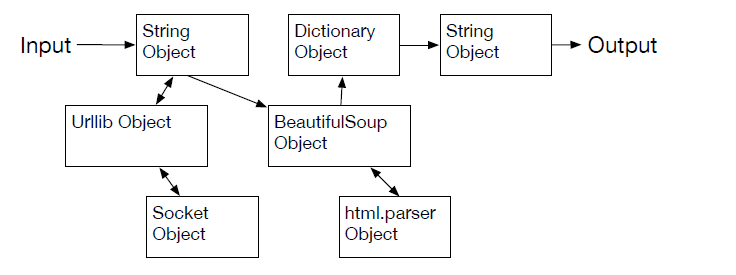

In questo momento la cosa più importante non è comprendere appieno il funzionamento di questo programma, quanto piuttosto vedere com’é stato strutturato questo insieme di oggetti e di come ne viene orchestrato lo scambio di informazioni.

È anche importante notare che quando studiavamo il funzionamento di uno script nelle prime lezioni, eravamo in grado di capire appieno cosa stava
succedendo senza nemmeno renderci conto che il programma stava "gestendo il movimento dei dati tra gli oggetti presenti". In quel momento erano solo righe di codice che portavano a termine il lavoro.

***14.5 Suddividere un problema - l’incapsulamento***

Uno dei vantaggi dell’approccio della programmazione ad oggetti è la possibilità di ridurre la complessità di uno script: anche se abbiamo la necessità di sapere come sfruttare urllib e BeautifulSoup, non abbiamo bisogno di sapere come funzionino internamente queste librerie. Ciò ci consente di concentrarci sulla parte del problema che dobbiamo risolvere lasciando perdere altre parti del programma.

Questa capacità di concentrarci sulla parte di un programma che ci interessa ignorando il resto del programma è utile anche per gli sviluppatori degli oggetti stessi: i programmatori che curano lo sviluppo di BeautifulSoup non hanno bisogno di sapere o preoccuparsi di come abbiamo recuperato la pagina HTML da analizzare, quali parti vogliamo leggere o cosa intendiamo fare con i dati che abbiamo estratto.

C’é un’altra parola che viene comunemente utilizzata per rendere l’idea che stiamo ignorando il funzionamento interno degli oggetti che usiamo: **incapsulamento**. In altre parole significa che possiamo sapere come utilizzare un oggetto senza essere realmente a conoscenza di cosa realmente capiti al suo interno.

***14.6 Il nostro primo oggetto Python***

Semplificando al massimo, un oggetto è una porzione di codice con proprie strutture di dati di dimensioni minori dell’intero programma. Il definire una funzione significa indicare tramite un nome una porzione di codice ben definita che possiamo invocare successivamente secondo le nostre necessità utilizzando solo il nome che le abbiamo assegnato.

Un oggetto può contenere un certo numero di funzioni (che chiamiamo "metodi") e
i dati utilizzati da tali funzioni. Definiamo **dati** gli elementi che compongono degli *attributi* dell’oggetto.

**La parola chiave *class* viene utilizzata per definire i dati e il codice che compongono ciascuno degli oggetti**. *class* include inoltre il nome della classe e inizia con un blocco di codice indentato in cui includiamo *gli attributi* (**dati**) e *i metodi* (**codice**).

In [ ]:
#class
class PartyAnimal:
  x = 0

  def party(self) :
    self.x = self.x + 1
    print("So far",self.x)


#main
an = PartyAnimal()
an.party()
an.party()
an.party()

In [ ]:
PartyAnimal.party(an)

Ogni metodo, essendo una funzione, inizia con la parola chiave `def` ed è costituito da un blocco di codice *indentato*. L’esempio precedente ha un **attributo** (`x`) e un **metodo** (`party`). I metodi hanno uno primo parametro speciale chiamato per convenzione `self`.

Proprio come la parola chiave `def` non provoca l’esecuzione del codice della funzione, **la parola chiave `class` non crea un oggetto**; piuttosto definisce un modello che indica **quali dati e codice saranno contenuti in ogni oggetto di tipo `PartyAnimal`**. Potremmo immaginare che la classe sia uno stampino per biscotti e che gli oggetti creati utilizzando la classe siano i biscotti. Nel preparare i biscotti, sappiamo che *la glassa non va messa sullo stampino quanto piuttosto sui biscotti* e abbiamo sempre la possibilità di *mettere una glassa diversa su ciascun biscotto*.

Analizziamo il codice di esempio. Osserviamo la prima riga di
codice eseguibile:

`an = PartyAnimal()`

Questo è il punto in cui indichiamo a Python dove costruire un oggetto o, per dirlo in linguaggio tecnico, **l’istanza della classe denominata PartyAnimal**.

Python costruisce l’**oggetto** con i dati e i metodi corretti e restituisce l’oggetto che viene quindi *assegnato alla variabile an*. In un certo senso tutto questo è abbastanza simile ad altre istruzioni che abbiamo visto qualche lezione fa; ad esempio
```
counts = dict()
```
Qui stiamo dicendo a Python di creare un oggetto usando il template dict (già
presente nel linguaggio), restituire l’istanza del dizionario e assegnarla alla variabile counts.



Dopo aver utilizzato la classe `PartyAnimal` per costruire un oggetto, la
variabile `an` ci permette di puntare a quell’oggetto, accedere al *codice* (metodi) e ai *dati* (attributi) che quella particolare istanza di un oggetto PartyAnimal contiene.
Ogni oggetto/istanza `Partyanimal` contiene al suo interno una variabile `x` e un metodo/funzione `party` che viene richiamato in questa riga:

`an.party()`

Quando viene chiamato il metodo `party`, il primo parametro (chiamato per convenzione `self`) punta alla particolare *istanza* dell’oggetto `PartyAnimal` che viene chiamata all’interno di `party`. All’interno del metodo `party`, possiamo vedere la riga:

`self.x = self.x + 1`

Questa sintassi utilizzando l’operatore *punto* indica **la x dentro self**. Quindi **ogni volta che viene chiamato `party()` viene incrementato di 1 il valore interno x che viene poi visualizzato**.

Per comprendere meglio la differenza tra una funzione globale e un metodo
all’interno di una classe/oggetto, nella riga seguente possiamo vedere un altro modo per chiamare il metodo `party` all’interno dell’oggetto `an`:

`PartyAnimal.party(an)`

In questa variante stiamo accedendo al codice dalla classe e passando esplicitamente il puntatore dell’oggetto `an` come primo parametro (ad esempio self all’interno del metodo).

Possiamo pensare a `an.party()` come ad un’abbreviazione della riga precedente.

Guardiamo l'output generato dal nostro script: l’oggetto è stato costituito e il metodo party è chiamato quattro volte, incrementando e visualizzando il valore di `x` all’interno l’oggetto `an`.


***14.7 Le classi come tipi***

Come abbiamo visto, in Python tutte le variabili hanno un type che possiamo esaminare tramite la funzione integrata dir. queste funzionalità sono estese alle classi che creiamo.

In [ ]:
class PartyAnimal:
  x = 0
  def party(self) :
    self.x = self.x + 1
    print("So far",self.x)

an = PartyAnimal()
print ("Type", type(an))
print ("Dir ", dir(an))
print ("Type", type(an.x))
print ("Type", type(an.party))

Notiamo che abbiamo creato un nuovo type utilizzando la parola chiave class e nell’output di dir che sia l’attributo intero x sia il metodo party sono disponibili nell’oggetto.

***14.8 Ciclo di vita dell’oggetto***

Negli esempi precedenti abbiamo definito una classe (*template*) e l’abbiamo utilizzata per creare un’istanza (*oggetto*) che poi abbiamo utilizzato fino al termine del programma, momento in cui tutte le variabili sono state eliminate. Di solito
non pensiamo molto alla creazione e distruzione delle variabili ma capita spesso che, quando i nostri oggetti diventano più complessi, dobbiamo agire all’interno dell’oggetto per sistemare le cose mentre l’oggetto viene costruito e possibilmente
pulire le cose prima che questo venga eliminato.
Se vogliamo che il nostro oggetto si renda conto di questi momenti di costruzione e distruzione, dobbiamo aggiungere dei metodi che hanno una denominazione
speciale:

In [ ]:
class PartyAnimal:
  x = 0

  def __init__(self):
    print('I am constructed')

  def party(self) :
    self.x = self.x + 1
    print('So far',self.x)

  def __del__(self):
    print('I am destructed', self.x)

In [ ]:
an = PartyAnimal()
an.party()
an.party()
an = 42
print('an contains',an)

Appena Python inizia a costruire il nostro oggetto, chiama il nostro metodo `__init__` per darci la possibilità di impostare alcuni valori iniziali o predefiniti da passare all’oggetto. Quando Python incontra la riga

`an = 42`

nel concreto "cestina il nostro oggetto" in modo da poter riutilizzare la variabile `an` per memorizzare il valore 42. Proprio nel momento in cui il nostro oggetto `an` viene "distrutto" viene chiamato il codice distruttore (`__del__`). Non possiamo
impedire che la nostra variabile venga distrutta, ma possiamo fare ogni operazione di pulizia necessaria prima che il nostro oggetto non esista più.

Durante lo sviluppo di oggetti è abbastanza comune aggiungere un costruttore a un oggetto per impostarne i valori iniziali; è invece abbastanza raro che sia necessario impostarne un distruttore.

***14.9 Molte istanze***

Finora, abbiamo definito una classe, creato un singolo oggetto che abbiamo usato ed infine eliminato. Ma la vera potenza della programmazione orientata agli oggetti si rivela quando utilizziamo molte istanze della nostra classe.

Quando creiamo più oggetti dalla nostra classe potremmo aver bisogno di impostare valori iniziali diversi per ciascuno di essi. Ciò é possibile passando i dati nei costruttori per assegnare a ciascun oggetto un diverso valore iniziale

In [ ]:
class PartyAnimal:
  x = 0
  name = ''

  def __init__(self, nam):
    self.name = nam
    print(self.name,'constructed')

  def party(self) :
    self.x = self.x + 1
    print(self.name,'party count',self.x)

s = PartyAnimal('Sally')
j = PartyAnimal('Jim')
s.party()
j.party()
s.party()

Il costruttore ha sia un parametro *self* che punta all’istanza dell’oggetto sia altri parametri che vengono passati al costruttore mentre l’oggetto viene costruito; la riga presente all’interno del costruttore

`self.name = nam`

Copia il parametro passato in `nam` nell’attributo `name` all’interno dell’istanza dell’oggetto.
L’output del programma mostra che **ognuno degli oggetti** (`s` e `j`) **contiene le proprie copie indipendenti** di `x` e `nam`

***14.10 Ereditarietà***

Un’altra caratteristica potente della programmazione orientata agli oggetti è la possibilità di creare una nuova classe estendendone una già esistente. Quando
estendiamo una classe, chiamiamo la classe originale *classe genitore* (o anche *madre/padre*) e la nuova
*classe figlia* (o anche *figlia/figlio*)

In questo esempio sposteremo la nostra classe PartyAnimal nel suo file (scarichiamo da [qui](http://www.py4e.com/code3/party.py) il file)

In [ ]:
class PartyAnimal:
  x = 0
  name = ''
  def __init__(self, nam):
    self.name = nam
    print(self.name,'constructed')

  def party(self) :
    self.x = self.x + 1
    print(self.name,'party count',self.x)

Quindi abbiamo la possibilità di "importare" la classe PartyAnimal in un nuovo file ed estenderla  (scarichiamo da [qui](https://www.py4e.com/code3/party6.py) il file)

In [ ]:
from party import PartyAnimal

class CricketFan(PartyAnimal):
  points = 0
  def six(self):
    self.points = self.points + 6
    self.party()
    print(self.name,"points",self.points)

s = PartyAnimal("Sally")
s.party()
j = CricketFan("Jim")
j.party()
j.six()
print(dir(j))

Nel definire l’oggetto CricketFan abbiamo indicato che stiamo estendendo la classe PartyAnimal: tutte le variabili (*x*) e i metodi (*party*) della classe `PartyAnimal` sono ereditate dalla classe `CricketFan`.

Possiamo vedere che all’interno del metodo `six` nella classe *CricketFan* possiamo chiamare il metodo `party` dalla classe *PartyAnimal*. **Le variabili e i metodi della classe genitore sono uniti nella classe figlio.**

Durante l’esecuzione del programma possiamo vedere che s e j sono **istanze indipendenti di PartyAnimal e CricketFan**. **L’oggetto j ha capacità aggiuntive rispetto all’oggetto s**.

Nell’output `dir` per l’oggetto j (*istanza della classe CricketFan*) possiamo vedere che j **ha sia gli attributi e i metodi della classe genitore sia gli attributi e i metodi che sono stati aggiunti quando la classe è stata estesa per creare la classe CricketFan.**

**14.11 Sommario**

Quello che abbiamo visto è un’introduzione molto basilare sulla programmazione ad oggetti dove
ci siamo concentrati principalmente sulla terminologia e sulla sintassi utilizzate nella definizione ed utilizzo degli oggetti.

Basandoci sul codice che abbiamo utilizzato dall’inizio di questo capitolo, dovremmo riuscire a capire cosa stia succedendo qui sotto:

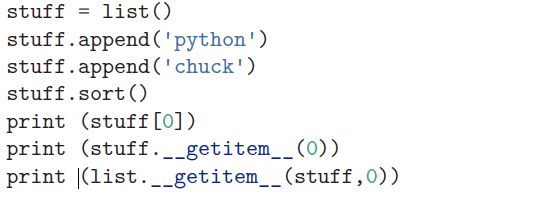

La prima riga costruisce un oggetto *list*. Durante la sua costruzione viene chiamato il metodo constructor (chiamato `__init__`) per impostare gli attributi dei dati interni che verranno utilizzati per memorizzare i dati dell’elenco. Grazie
all’*incapsulamento* non abbiamo bisogno di sapere o di preoccuparci di come siano organizzati questi attributi dei dati interni.

Non stiamo passando alcun parametro al costruttore e quando il costruttore ritorna, usiamo la variabile *stuff* per puntare all’istanza restituita della classe *list*.

La seconda e la terza riga chiamano il metodo *append* con un parametro per aggiungere un nuovo elemento alla fine dell’elenco tramite l’aggiornamento degli attributi
all’interno di *stuff*. Nella quarta riga viene chiamato il metodo *sort*, senza parametri, per ordinare i dati all’interno dell’oggetto *stuff*.

Quindi visualizziamo il primo elemento nell’elenco usando le parentesi quadre che sono una scorciatoia per chiamare il metodo `__getitem__` all’interno dell’oggetto *stuff*. Questo equivale a chiamare il metodo `__getitem__` nella classe *list* passando l’oggetto *stuff* come primo parametro e la posizione che stiamo cercando come secondo parametro.

Al termine del programma, prima che venga scartato l’oggetto *stuff*, viene chiamato il distruttore (denominato `__del__`) in modo che l’oggetto possa eliminare qualsiasi questione rimasta in sospeso.

Queste sono le basi e la terminologia della programmazione ad oggetti. Ci sono molti dettagli aggiuntivi su come utilizzare al meglio questo approccio durante lo sviluppo di applicazioni e librerie di grandi dimensioni ma ciò va oltre lo scopo di
questo capitolo.

***Per integrare:***

https://it.wikipedia.org/wiki/Programmazione_orientata_agli_oggetti